In [13]:
import networkx as nx
import matplotlib.pyplot as plt

def build_graph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    # get graph nodes
    nodes = get_entities(pdoc)
    # get graph edges
    edges = get_relations(pdoc)
    # create graph structure with networkx
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    return G

def build_digraph(doc):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)
    # get graph nodes
    nodes = get_entities(pdoc)
    # get graph edges
    edges = get_relations(pdoc)
    # create graph structure with networkx
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    return G

In [14]:
def preprocess_document(document, sentence_spliter='.', word_spliter=' ', punct_mark=','):
    # lowercase all words and remove trailing whitespaces
    document = document.lower().strip()
    # remove unwanted punctuation marks
    for pm in punct_mark:
        document = document.replace(pm, '')
    # get list of sentences which are non-empty
    sentences = [sent for sent in document.split(sentence_spliter) if sent != '']
    # get list of sentences which are lists of words
    document = []
    for sent in sentences:
        words = sent.strip().split(word_spliter)
        document.append(words)
    return document

In [15]:
def get_entities(document):
    unique_words = []
    for sent in document:
        for word in sent:
            if word not in unique_words:
                unique_words.append(word)
    return unique_words

In [16]:
def get_relations(document):
    bigrams = []
    for sent in document:
        for i in range(len(sent)-1):
            pair = [sent[i], sent[i+1]]
            # only add unique bigrams
            if pair not in bigrams:
                bigrams.append(pair)
    return bigrams

In [17]:
def plot_graph(G, title=None):
    # set figure size
    plt.figure(figsize=(8, 8))
    # define position of nodes in figure
    pos = nx.nx_agraph.graphviz_layout(G)
    # draw nodes and edges
    nx.draw(G, pos=pos, with_labels=True)
    # get edge labels (if any)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    # draw edge labels (if any)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    # plot the title (if any)
    plt.title(title)
    plt.show()
    return

### Undirected, Unweighted Graph

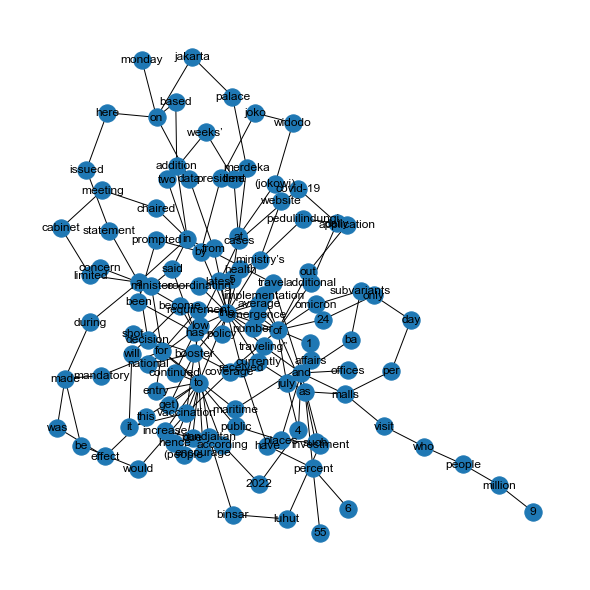

In [20]:
doc = 'Booster vaccination would be made mandatory for entry to public places and travel in two weeks’ time at the latest, Coordinating Minister for Maritime Affairs and Investment, Luhut Binsar Pandjaitan, has said. A decision to this effect was made during a limited cabinet meeting chaired by President Joko Widodo (Jokowi) at Merdeka Palace, Jakarta, on Monday. The implementation of the policy has been prompted by the low national booster coverage of 24.55 percent as of July 4, 2022, according to the Health Ministry’s website.In addition, based on data from the ministry’s PeduliLindungi application, out of the average of 1.9 million people who visit malls per day, only 24.6 percent have received the booster shot.As currently, the number of additional daily COVID-19 cases has continued to increase due to the emergence of Omicron subvariants BA.4 and BA.5, the low booster vaccination coverage has become a concern. Hence, to encourage (people to get) booster vaccination, it will become the requirement for entry to public places, such as malls and offices, and traveling,” the coordinating minister said in a statement issued here on Monday.'
G = build_graph(doc)
plot_graph(G)

### Directed, Unweighted Graph

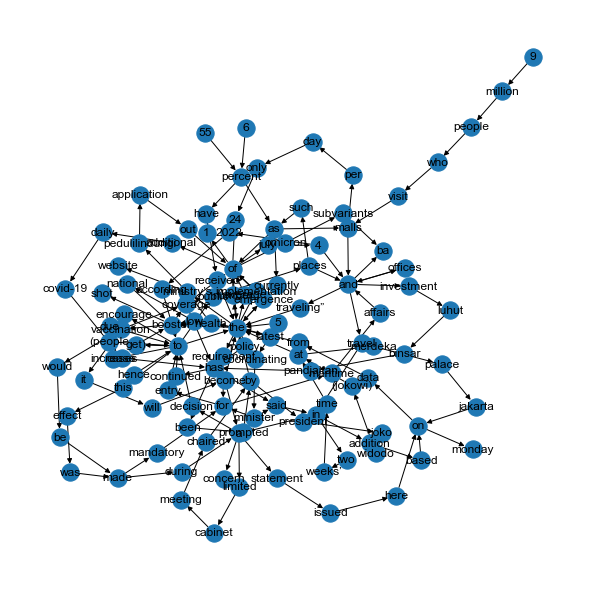

In [22]:
G2 = build_digraph(doc)
plot_graph(G2)

### Directed, Weighted Graph

In [23]:
def get_weighted_edges(document):
    bigrams = {}
    for sent in document:
        for i in range(len(sent) - 1):
            pair = str([sent[i], sent[i+1]])
            if pair not in bigrams.keys():
                bigrams[pair] = 1
            else:
                bigrams[pair] += 1
    # convert to networkx standard form each edge connecting nodes u and v = [u, v, weight]
    weighted_edges_format = []
    for pair, weight in bigrams.items():
        w1, w2 = eval(pair)
        weighted_edges_format.append([w1, w2, weight])

    return weighted_edges_format

In [24]:
def build_weighted_digraph(document):
    # preprocess document for standardization
    pdoc = preprocess_document(doc)

    # get graph nodes
    nodes = get_entities(pdoc)

    # get weighted edges
    weighted_edges = get_weighted_edges(pdoc)

    # create graph structure with NetworkX
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_weighted_edges_from(weighted_edges)

    return G

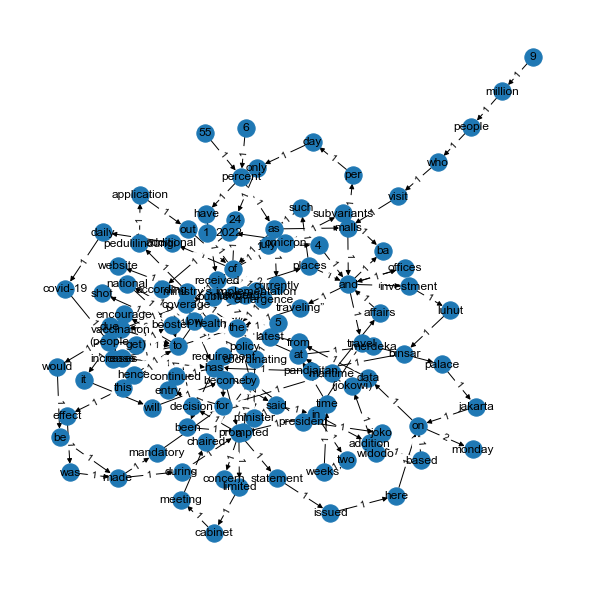

In [25]:
G3 = build_weighted_digraph(doc)
plot_graph(G3)